# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 05.11.2020

Мягкий дедлайн: 01:59MSK 18.11.2019

Жесткий дедлайн: 01:59MSK 22.11.2019

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/21899 нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 10 + 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

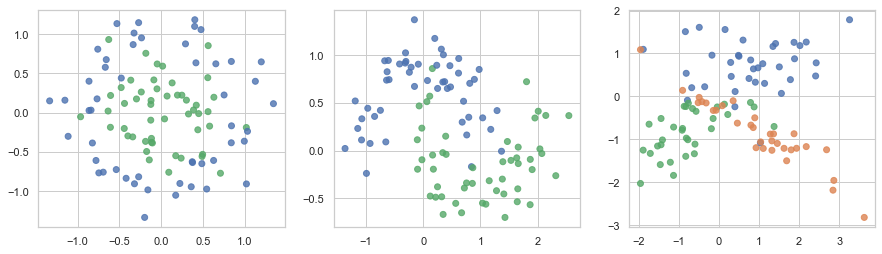

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y, ax=None):
    if ax is None:    # modified to plot subplots
        ax = plt.gca()
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    return

In [6]:
# # Пример:
# from sklearn.linear_model import LinearRegression
# X, y = datasets[2]
# lr  = LinearRegression().fit(X, y)
# plot_surface(lr, X, y)

In [7]:
from sklearn.model_selection import train_test_split
X_circles, y_circles = datasets[0]
X_moons, y_moons = datasets[1]
X_circles_train, X_circles_test, y_circles_train, y_circles_test = train_test_split(
    X_circles, y_circles, test_size=0.3, random_state=42)
X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=42)

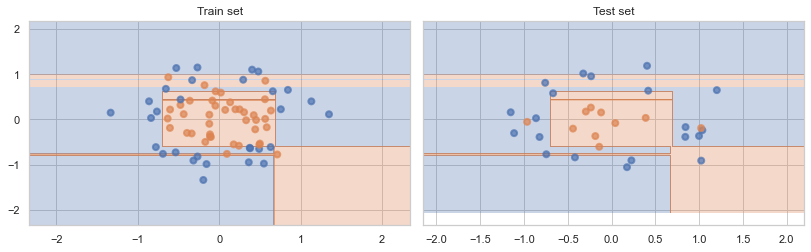

In [8]:
from sklearn.tree import DecisionTreeClassifier
model_circles = DecisionTreeClassifier().fit(X_circles_train, y_circles_train)
f, axs = plt.subplots(1,2, sharey=True,figsize=(12,4))
plot_surface(model_circles, X_circles_train, y_circles_train, axs[0])
axs[0].set_title('Train set')
plot_surface(model_circles, X_circles_test, y_circles_test, axs[1])
axs[1].set_title('Test set')
plt.show()

In [9]:
from sklearn.metrics import accuracy_score
pred_train_circles = model_circles.predict(X_circles_train)
pred_circles = model_circles.predict(X_circles_test)
print('Train accuracy (circles): %.2f' % accuracy_score(y_circles_train, pred_train_circles))
print('Test accuracy (circles): %.2f' % accuracy_score(y_circles_test, pred_circles))

Train accuracy (circles): 1.00
Test accuracy (circles): 0.73


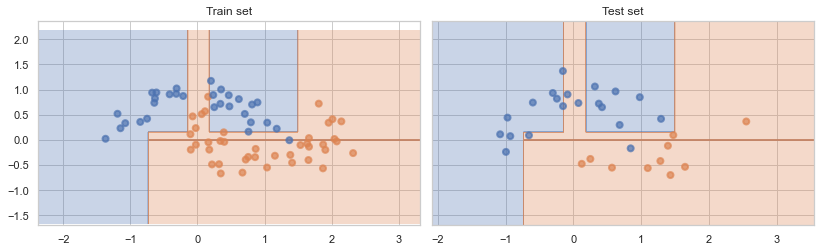

In [10]:
model_moons = DecisionTreeClassifier().fit(X_moons_train, y_moons_train)
f, axs = plt.subplots(1,2, sharey=True,figsize=(12,4))
plot_surface(model_moons, X_moons_train, y_moons_train, axs[0])
axs[0].set_title('Train set')
plot_surface(model_moons, X_moons_test, y_moons_test, axs[1])
axs[1].set_title('Test set')
plt.show()

In [11]:
pred_train_moons = model_moons.predict(X_moons_train)
pred_moons = model_moons.predict(X_moons_test)
print('Train accuracy (moons): %.2f' % accuracy_score(y_moons_train, pred_train_moons))
print('Test accuracy (moons): %.4f' % accuracy_score(y_moons_test, pred_moons))

Train accuracy (moons): 1.00
Test accuracy (moons): 0.8667


__Ответ:__ *Видно, что деревья переобучились - добавляя предикаты для отдельных объектов (например, в первой выборке `circles` выделяется отдельная область лишь для одного (оранжевого) объекта, на тестовой выборке в этой области объектов того же класса нет, более того, получается, что объекты другого класса неправильно распределяются). Для выборки `moons` это также верно, модель переобучилась здесь чуть меньше. Также стоит упомянуть, что в целом размер выборки небольшой, поэтому на тестовой выборке более заметны ошибки.*

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [12]:
depth_grid = range(3, 9)    # max_depth
samples_leaf_grid = range(1, 4)    # min_samples_leaf

In [13]:
models_circles = []
accuracy_circles = []

for depth in depth_grid:
    for samples_leaf in samples_leaf_grid:
        model = DecisionTreeClassifier(
            max_depth = depth, 
            min_samples_leaf = samples_leaf
        ).fit(X_circles_train, y_circles_train)
        pred_train = model.predict(X_circles_train)
        pred = model.predict(X_circles_test)
        accuracy_circles.append((accuracy_score(y_circles_train, pred_train), 
                                 accuracy_score(y_circles_test, pred)))
        models_circles.append(model)

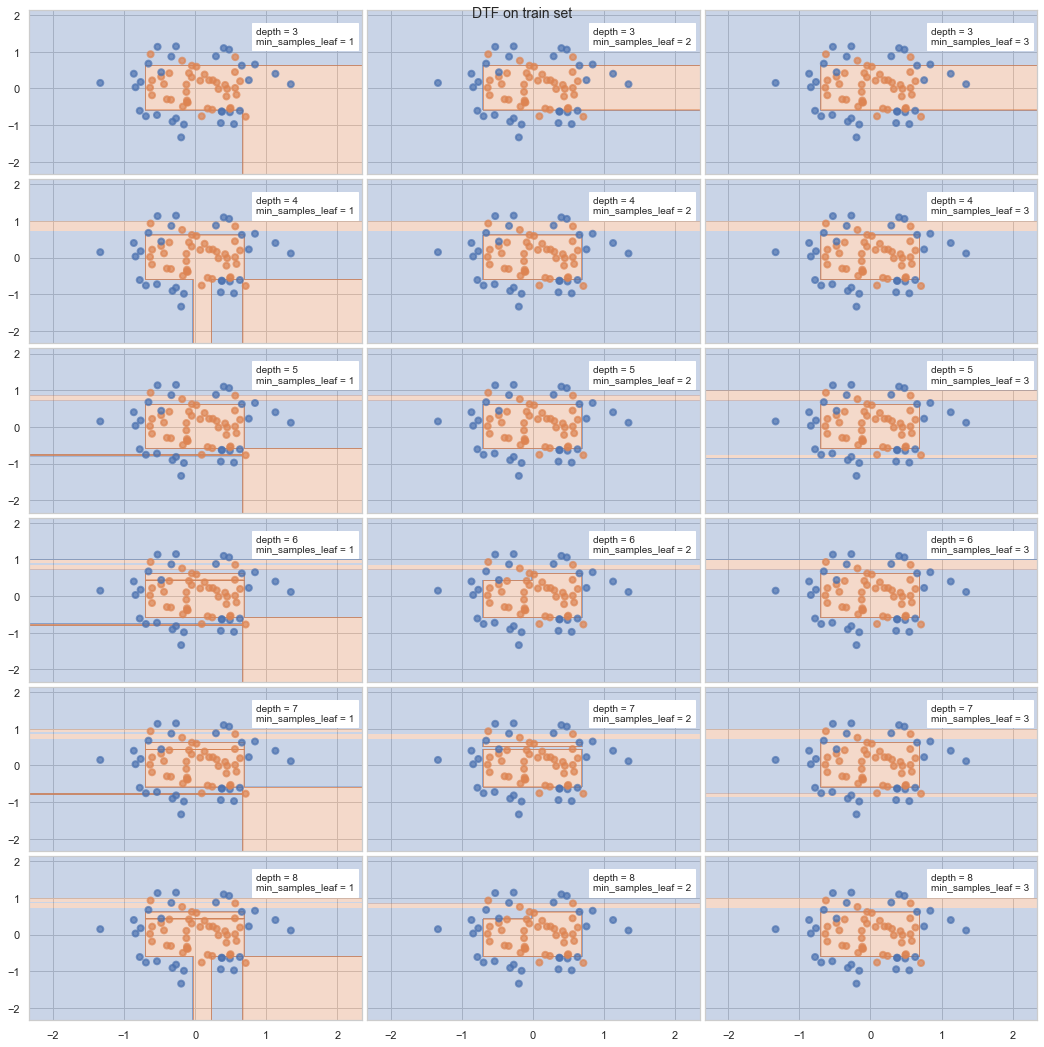

In [14]:
rows = 6 
cols = 3
f, axs = plt.subplots(6,3, figsize=(5 * cols, 2.5 * rows), sharey=True, sharex=True)
f.suptitle('DTF on train set', fontsize='14')
for i in range(rows):
    for j in range(cols):
        model = models_circles[i * cols + j]
        plot_surface(model, X_circles_train, y_circles_train, axs[i][j])
        params = model.get_params()
        depth = params['max_depth']
        samples_leaf = params['min_samples_leaf']
        title = 'depth = ' + str(depth) + '\nmin_samples_leaf = ' + str(samples_leaf)
        axs[i][j].annotate(title, (.85,1.2),backgroundcolor='w')

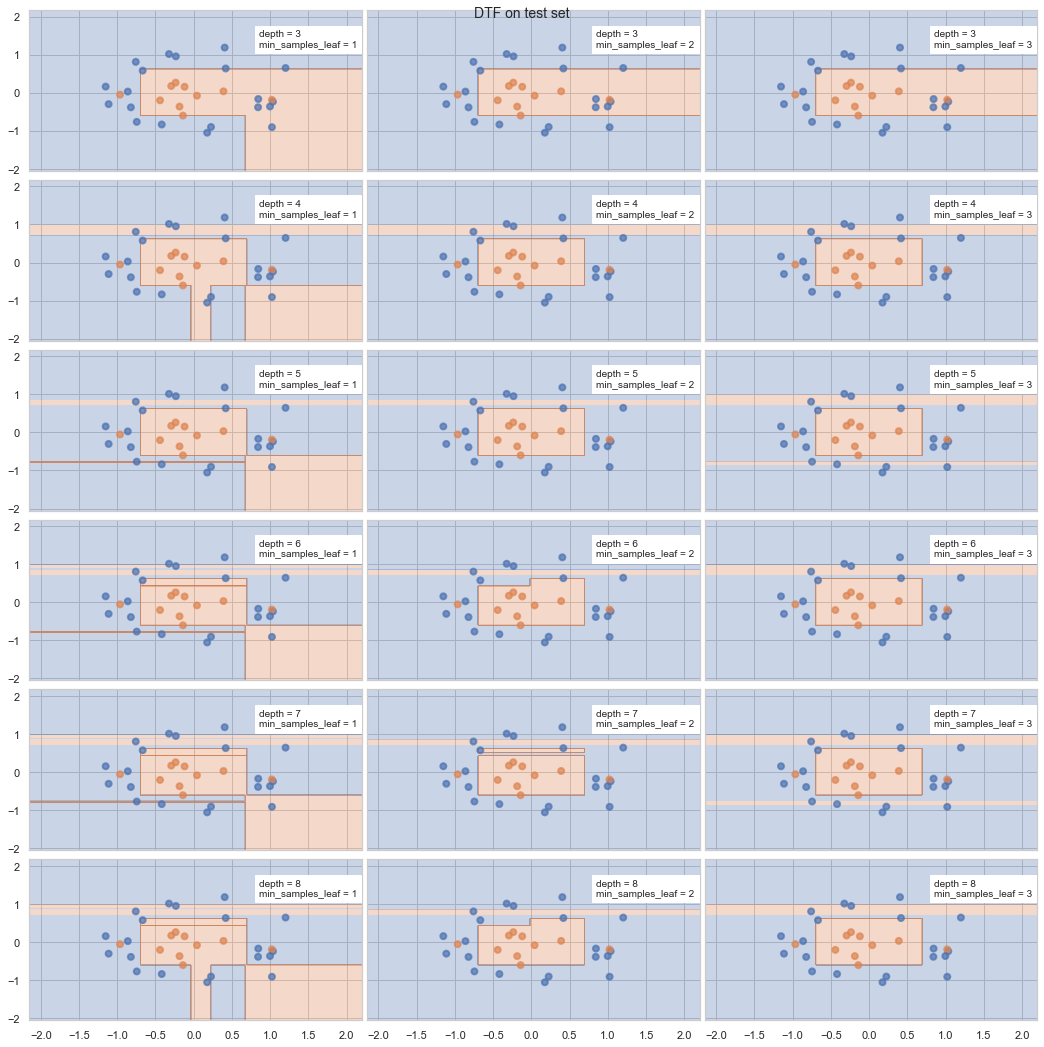

In [15]:
rows = 6 
cols = 3
f, axs = plt.subplots(6,3, figsize=(5 * cols, 2.5 * rows), sharey=True, sharex=True)
f.suptitle('DTF on test set', fontsize=14)
for i in range(rows):
    for j in range(cols):
        model = models_circles[i * cols + j]
        plot_surface(model, X_circles_test, y_circles_test, axs[i][j])
        params = model.get_params()
        depth = params['max_depth']
        samples_leaf = params['min_samples_leaf']
        title = 'depth = ' + str(depth) + '\nmin_samples_leaf = ' + str(samples_leaf)
        axs[i][j].annotate(title, (.85,1.2),backgroundcolor='w')

In [16]:
print('Circles dataset')
print('\tTrain accuracy score\t\tTest accuracy score')
print('\ts = 1\ts = 2\ts = 3\t\ts = 1\ts = 2\ts = 3')
for i in range(rows):
    print('d =', i, end='\t')
    for j in range(cols):
        print("%.4f" % accuracy_circles[i * 3 + j][0], end='\t')
    for j in range(cols):
        print("\t%.4f" % accuracy_circles[i * 3 + j][1], end='')
    print()

Circles dataset
	Train accuracy score		Test accuracy score
	s = 1	s = 2	s = 3		s = 1	s = 2	s = 3
d = 0	0.8857	0.8714	0.8714		0.7333	0.7667	0.7667
d = 1	0.9571	0.9286	0.9286		0.7000	0.8000	0.8000
d = 2	0.9714	0.9429	0.9429		0.7667	0.8333	0.7333
d = 3	1.0000	0.9429	0.9286		0.7333	0.8667	0.8000
d = 4	1.0000	0.9429	0.9429		0.7333	0.8333	0.7333
d = 5	1.0000	0.9429	0.9286		0.7000	0.8667	0.8000


In [17]:
models_moons = []
accuracy_moons = []

for depth in depth_grid:
    for samples_leaf in samples_leaf_grid:
        model = DecisionTreeClassifier(
            max_depth = depth, 
            min_samples_leaf = samples_leaf
        ).fit(X_moons_train, y_moons_train)
        pred_train = model.predict(X_moons_train)
        pred = model.predict(X_moons_test)
        accuracy_moons.append((accuracy_score(y_moons_train, pred_train), 
                                 accuracy_score(y_moons_test, pred)))
        models_moons.append(model)

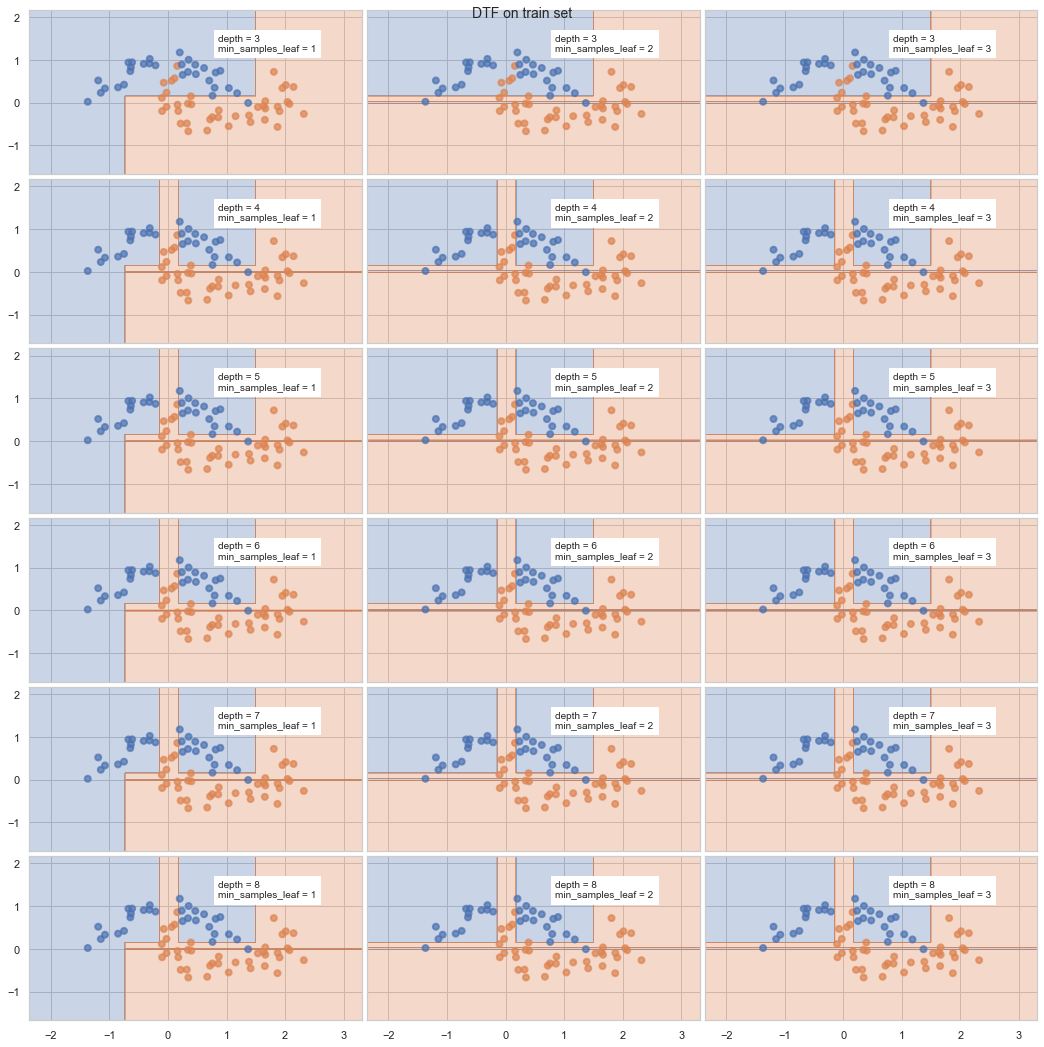

In [18]:
rows = 6 
cols = 3
f, axs = plt.subplots(6,3, figsize=(5 * cols, 2.5 * rows), sharey=True, sharex=True)
f.suptitle('DTF on train set', fontsize='14')
for i in range(rows):
    for j in range(cols):
        model = models_moons[i * cols + j]
        plot_surface(model, X_moons_train, y_moons_train, axs[i][j])
        params = model.get_params()
        depth = params['max_depth']
        samples_leaf = params['min_samples_leaf']
        title = 'depth = ' + str(depth) + '\nmin_samples_leaf = ' + str(samples_leaf)
        axs[i][j].annotate(title, (.85,1.2),backgroundcolor='w')

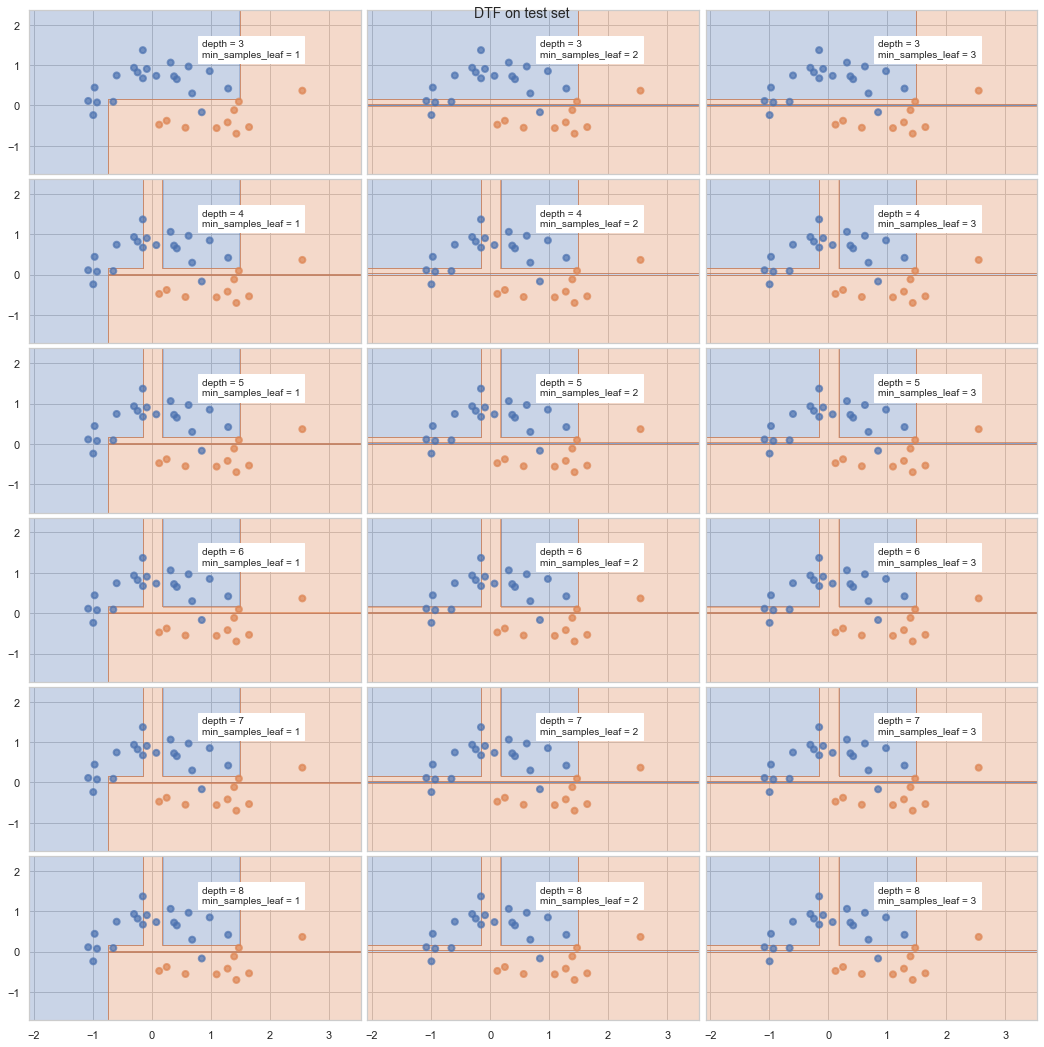

In [19]:
rows = 6 
cols = 3
f, axs = plt.subplots(6,3, figsize=(5 * cols, 2.5 * rows), sharey=True, sharex=True)
f.suptitle('DTF on test set', fontsize=14)
for i in range(rows):
    for j in range(cols):
        model = models_moons[i * cols + j]
        plot_surface(model, X_moons_test, y_moons_test, axs[i][j])
        params = model.get_params()
        depth = params['max_depth']
        samples_leaf = params['min_samples_leaf']
        title = 'depth = ' + str(depth) + '\nmin_samples_leaf = ' + str(samples_leaf)
        axs[i][j].annotate(title, (.85,1.2),backgroundcolor='w')

In [20]:
print('Moons dataset')
print('\tTrain accuracy score\t\tTest accuracy score')
print('\ts = 1\ts = 2\ts = 3\t\ts = 1\ts = 2\ts = 3')
for i in range(rows):
    print('d =', i, end='\t')
    for j in range(cols):
        print("%.4f" % accuracy_moons[i * 3 + j][0], end='\t')
    for j in range(cols):
        print("\t%.4f" % accuracy_moons[i * 3 + j][1], end='')
    print()

Moons dataset
	Train accuracy score		Test accuracy score
	s = 1	s = 2	s = 3		s = 1	s = 2	s = 3
d = 0	0.9143	0.9143	0.9143		0.9333	0.8333	0.8333
d = 1	1.0000	0.9857	0.9857		0.8667	0.7667	0.7667
d = 2	1.0000	0.9857	0.9857		0.8667	0.7667	0.7667
d = 3	1.0000	0.9857	0.9857		0.8667	0.7667	0.7667
d = 4	1.0000	0.9857	0.9857		0.8667	0.7667	0.7667
d = 5	1.0000	0.9857	0.9857		0.8667	0.7667	0.7667


__Ответ:__ *По графикам и результатам видим, что чем больше значение допустимой глубины дерева (`max_depth`) и чем меньше минимальное количество объектов в листе, тем точнее получается классификация на обучающей выборке. (Это соответствует ожиданиям - чем глубже дерево, тем больше предикатов мы рассматриваем, тем больше разделений происходит. Аналогично, чем меньше необходимое количество объектов в листовой вершине, тем больше листьев у нас образуется, т.е. больше разных исходов учитывается). Однако для тестовой выборки в датасете `circles` изменения этих параметров несильно влияют на качество (значения то увеличиваются, то уменьшаются). Скорее всего это происходит из-за того, что тестовая выборка небольшая, и также то, что деревья переобучаются и подстраиваются под объекты обучающей выборки. В датасете `moons` значения перестают изменяться, начиная с max_depth = 1, т.к., видимо, при обучении почти сразу достигается разбиение (т.е. глубина дерева меньше заданного max_depth).*

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [21]:
data = pd.read_csv('students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [22]:
%load_ext autoreload

In [23]:
%autoreload 2

from hw5code import (
    find_best_split
)

In [24]:
data.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS'], dtype='object')

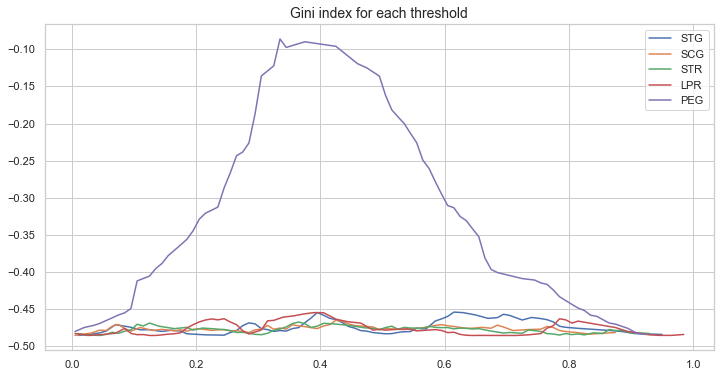

In [25]:
#plt.figure()
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.set_title('Gini index for each threshold', fontsize=14)
for col in data.columns:
    if col == ' UNS':
        continue
    res = find_best_split(data[col], data[' UNS'])
    ax.plot(res[0], res[1], label=col)
plt.legend()
plt.show()

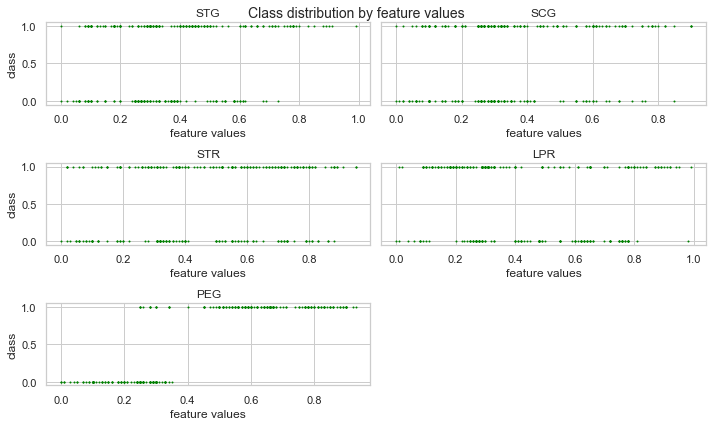

In [26]:
fig, axs = plt.subplots(3,2,figsize=(10,6), sharey=True)
fig.subplots_adjust(top=2)
fig.suptitle('Class distribution by feature values', fontsize=14)
axs[-1,-1].axis('off')
for i in range(3):
    for j in range(2):
        if (i * 2 + j > 4):
            break
        col = data.columns[i * 2 + j]
        axs[i][j].scatter(data[col], data[' UNS'], color='green',s=1)
        axs[i][j].set_title(col)
        axs[i][j].set(xlabel='feature values')
        if (j == 0):
            axs[i][j].set(ylabel='class')
plt.tight_layout()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** *Наибольшее значение критерия достигается при разделении по признаку `PEG`. Как видно из графиков распределения классов по признакам, для признака `PEG` разделение между классами самое явное, для остальных признаков почти для всех значений есть объекты из обеих классов одновременно. Кривая для "хороших" признаков наиболее выпукла, тогда как для менее хороших кривая плоская, ближе к прямой.*

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [27]:
data_7 = pd.read_csv('agaricus-lepiota.data', sep=',', header=None)
data_7.head(2)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


In [28]:
from sklearn.preprocessing import LabelEncoder

for col in data_7.columns:
    le = LabelEncoder()
    data_7[col] = le.fit_transform(data_7[col])

In [29]:
X_7 = data_7.drop(columns=0)
y_7 = data_7[0]
X_7_train, X_7_test, y_7_train, y_7_test = train_test_split(X_7, y_7, test_size=0.5)
for a in [X_7_train, X_7_test, y_7_train, y_7_test]:
    a.reset_index(inplace=True, drop=True)

In [30]:
from hw5code import DecisionTree

In [31]:
dt = DecisionTree(['categorical'] * len(X_7.columns))
dt.fit(np.array(X_7_train), np.array(y_7_train))

In [32]:
pred_7 = dt.predict(np.array(X_7_test))

print('Accuracy score on test set:', accuracy_score(y_7_test, pred_7))

Accuracy score on test set: 0.999015263417036


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [33]:
data_8 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data",header=None)
y_8 = data_8[data_8.shape[1] - 1]
y_8 = (y_8 == 'positive')
data_8.drop(columns=data_8.shape[1] - 1, inplace=True)
for col in data_8.columns:
    le = LabelEncoder()
    data_8[col] = le.fit_transform(data_8[col])

X_8_train, X_8_test, y_8_train, y_8_test = train_test_split(data_8, y_8, test_size=0.3, random_state=42)

In [34]:
depth = range(3,10)
accuracy_depth = []
for max_depth in depth:
    model = DecisionTree(['categorical'] * data_8.shape[1], max_depth = max_depth)
    model.fit(np.array(X_8_train), np.array(y_8_train))
    pred_train = model.predict(np.array(X_8_train))
    pred = model.predict(np.array(X_8_test))
    accuracy_depth.append((accuracy_score(y_8_train, pred_train), accuracy_score(y_8_test, pred)))

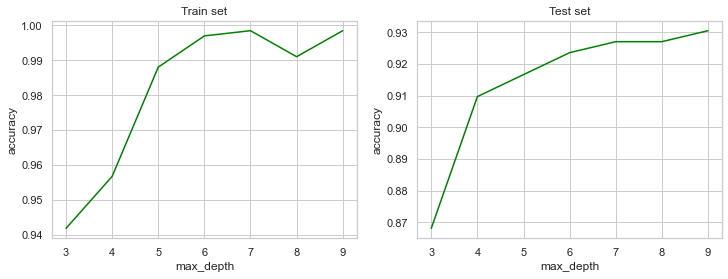

In [35]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(depth, list(map(lambda x: x[0], accuracy_depth)),c='green')
ax[0].set_title('Train set')
ax[0].set(xlabel = 'max_depth', ylabel='accuracy')

ax[1].plot(depth, list(map(lambda x: x[1], accuracy_depth)),c='green')
ax[1].set_title('Test set')
ax[1].set(xlabel = 'max_depth', ylabel='accuracy')

plt.show()

In [36]:
sample_leaf = range(1,7)
accuracy_leaf = []
for min_leaf in sample_leaf:
    model = DecisionTree(['categorical'] * data_8.shape[1], min_samples_leaf = min_leaf)
    model.fit(np.array(X_8_train), np.array(y_8_train))
    pred_train = model.predict(np.array(X_8_train))
    pred = model.predict(np.array(X_8_test))
    accuracy_leaf.append((accuracy_score(y_8_train, pred_train), accuracy_score(y_8_test, pred)))

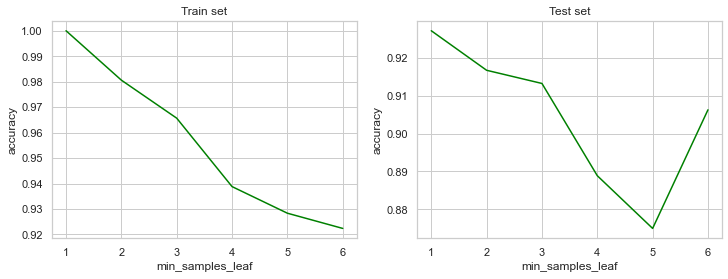

In [37]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(sample_leaf, list(map(lambda x: x[0], accuracy_leaf)),c='green')
ax[0].set_title('Train set')
ax[0].set(xlabel = 'min_samples_leaf', ylabel='accuracy')

ax[1].plot(sample_leaf, list(map(lambda x: x[1], accuracy_leaf)),c='green')
ax[1].set_title('Test set')
ax[1].set(xlabel = 'min_samples_leaf', ylabel='accuracy')

plt.show()

In [38]:
sample_split = range(1,7)
accuracy_split = []
for min_split in sample_split:
    model = DecisionTree(['categorical'] * data_8.shape[1], min_samples_split = min_split)
    model.fit(np.array(X_8_train), np.array(y_8_train))
    pred_train = model.predict(np.array(X_8_train))
    pred = model.predict(np.array(X_8_test))
    accuracy_split.append((accuracy_score(y_8_train, pred_train), accuracy_score(y_8_test, pred)))

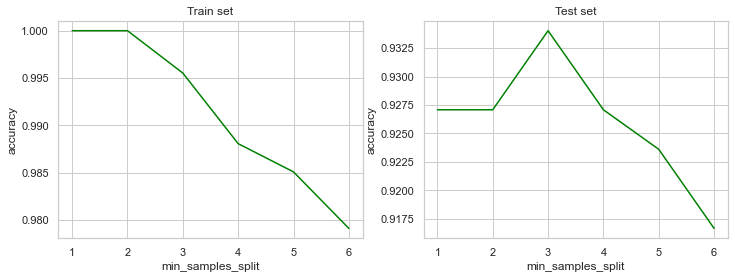

In [39]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(sample_split, list(map(lambda x: x[0], accuracy_split)),c='green')
ax[0].set_title('Train set')
ax[0].set(xlabel = 'min_samples_split', ylabel='accuracy')

ax[1].plot(sample_split, list(map(lambda x: x[1], accuracy_split)),c='green')
ax[1].set_title('Test set')
ax[1].set(xlabel = 'min_samples_split', ylabel='accuracy')

plt.show()

*Видим, что у нас получаются более высокое качество для моделей с большим значением допустимой глубины (`max_depth`), меньшим значением необходимого количества объектов в вершине для её разделения (`min_samples_split`) и меньшим значением необходимого количества объектов в листовой вершине (`min_samples_leaf`).*

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [40]:
data_tictactoe = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data",header=None)
data_cars = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",header=None)
data_nursery = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data",header=None)
data_mushrooms = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header=None)

In [41]:
y_tictactoe = data_tictactoe[data_tictactoe.shape[1] - 1]
y_tictactoe = (y_tictactoe == 'positive')
data_tictactoe.drop(columns=data_tictactoe.shape[1] - 1, inplace=True)

y_cars = data_cars[data_cars.shape[1] - 1]
y_cars = 1 * ((y_cars == 'good') | (y_cars == 'vgood'))
data_cars.drop(columns=data_cars.shape[1] - 1, inplace=True)

y_nursery = data_nursery[data_nursery.shape[1] - 1]
y_nursery = 1 * ((y_nursery == 'very_recom') | (y_nursery == 'spec_prior') | (y_nursery == 'priority'))
data_nursery.drop(columns=data_nursery.shape[1] - 1, inplace=True)

y_mushrooms = data_mushrooms[0]
y_mushrooms = 1 * (y_mushrooms == 'e')
data_mushrooms.drop(columns=0, inplace=True)

In [42]:
for data in [data_tictactoe, data_cars, data_nursery, data_mushrooms]:
    for col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

In [43]:
accuracy_df = pd.DataFrame(index=['mushrooms','tictactoe', 'cars', 'nursery'], 
                           columns=['dt_real', 'dt_cat', 'dt_ohe', 'dtc'])

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

datasets = [(data_tictactoe, y_tictactoe, 'tictactoe'), (data_cars, y_cars, 'cars'), 
            (data_nursery, y_nursery, 'nursery'), (data_mushrooms, y_mushrooms, 'mushrooms')]
for data, y, name in datasets:
    data = np.array(data)
    y = np.array(y)
    dt_real = DecisionTree(['real'] * data.shape[1])
    dt_cat = DecisionTree(['categorical'] * data.shape[1])
    data_ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).fit_transform(data)
    dtc = DecisionTreeClassifier()
    
    accuracy_df.loc[name,'dt_ohe'] = np.mean(cross_val_score(DecisionTree(['real'] * data_ohe.shape[1]), data_ohe, y, 
                                                             scoring=make_scorer(accuracy_score), cv=10))
    accuracy_df.loc[name,'dt_real'] = np.mean(cross_val_score(dt_real, data, y, scoring=make_scorer(accuracy_score), cv=10))
    accuracy_df.loc[name,'dt_cat'] = np.mean(cross_val_score(dt_cat, data, y, scoring=make_scorer(accuracy_score), cv=10))
    accuracy_df.loc[name,'dtc'] = np.mean(cross_val_score(dtc, data, y, scoring=make_scorer(accuracy_score), cv=10))

In [45]:
accuracy_df

,dt_real,dt_cat,dt_ohe,dtc
mushrooms,0.999261,1,0.999631,0.961123
tictactoe,0.467533,0.541458,0.543575,0.761294
cars,0.942647,0.967546,0.919495,0.942707
nursery,0.999691,0.999846,0.999537,0.999691


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** *алгоритмы ранжируются для разных наборов данных по разному: например, для набора `mushrooms` лучше всего работает `DecisionTree (categorical)`, тогда как для набора `tictactoe` лучше всего срабатываеет `DecisionTreeClassifier`. Из всех моделей, ожидаемо, хуже всего работают `DecisionTree (real)`, поскольку они считают признаки вещественными, тогда как по сути они являются категориальными. Лучше всего работает `DecisionTree (categorical)`, в котором объекты разделяются по отсортированным категориальным признакам. Поскольку у нас все признаки категориальные, это приводит к хорошим результатам.*

*Компонентой случайности можно назвать Label-кодирование категориальных признаков и применение моделей `DecisionTree (real)` и `DecisionTreeClassifier`, видно, что у бо'льших значений-label'ов больше объектов (см.ниже). В таблице сверху были получены довольно высокие результаты, однако вполне возможно, что если бы признаки закодировались значениями в другом порядке, то и результат бы вышел другим. Возможно, для улучшения моделей можно бы было закодировать категориальные признаки получше, например, используя счётчики (тогда это будет чем-то похоже на работу `DecisionTree (categorical)`)*

*Также если рассмотреть само распределение ответов для разных значений признаков (см. графики ниже), то можно заметить, что в принципе достижение высоких результатов сильно зависит от самих выборок: например, в выборке `cars` почти для всех объектов ответ является положительным, так что решающими деревьями мы тоже получим высокую точность, в `tictactoe` для одних и тех же значений признака есть большое количество как положительных признаков, так и отрицательных. В таком случае решающее дерево просто будет большую часть времени выдавать положительный класс (его в выборке для всех значений всех признаков больше), но в принципе спрогнозировать правильный ответ на данной выборке мы никак не сможем. В таком случае, вероятно, поможет предобработка признаков, так, чтобы для одних значений не было много объектов обоих классов одновременно. В выборке `nursery` в принципе решать ничего не надо, посколько как можно увидеть на графике, по последнему признаку мы можем с 100% вероятностью угадать класс (для значения 0 - положительный класс, 1 и 2 - отрицательный), очевидно, для него решающие деревья выдадут близкие к единице результаты. В `mushrooms` для всех признаков нет какого-то выделяющегося как последний признак в выборке `nursery`, наоборот, для всех признаков распределения ответы разнообразны.*

In [46]:
from collections import Counter
print('Unique values and count')
for data, _, name in datasets:
    print(name)
    for col in data.columns:
        print(Counter(data[col]))
    print()

Unique values and count
tictactoe
Counter({2: 418, 1: 335, 0: 205})
Counter({2: 378, 1: 330, 0: 250})
Counter({2: 418, 1: 335, 0: 205})
Counter({2: 378, 1: 330, 0: 250})
Counter({2: 458, 1: 340, 0: 160})
Counter({2: 378, 1: 330, 0: 250})
Counter({2: 418, 1: 335, 0: 205})
Counter({2: 378, 1: 330, 0: 250})
Counter({2: 418, 1: 335, 0: 205})

cars
Counter({3: 432, 0: 432, 2: 432, 1: 432})
Counter({3: 432, 0: 432, 2: 432, 1: 432})
Counter({0: 432, 1: 432, 2: 432, 3: 432})
Counter({0: 576, 1: 576, 2: 576})
Counter({2: 576, 1: 576, 0: 576})
Counter({1: 576, 2: 576, 0: 576})

nursery
Counter({2: 4320, 1: 4320, 0: 4320})
Counter({3: 2592, 2: 2592, 1: 2592, 0: 2592, 4: 2592})
Counter({0: 3240, 1: 3240, 3: 3240, 2: 3240})
Counter({0: 3240, 1: 3240, 2: 3240, 3: 3240})
Counter({0: 4320, 2: 4320, 1: 4320})
Counter({0: 6480, 1: 6480})
Counter({0: 4320, 2: 4320, 1: 4320})
Counter({2: 4320, 1: 4320, 0: 4320})

mushrooms
Counter({5: 3656, 2: 3152, 3: 828, 0: 452, 4: 32, 1: 4})
Counter({3: 3244, 2: 2556,

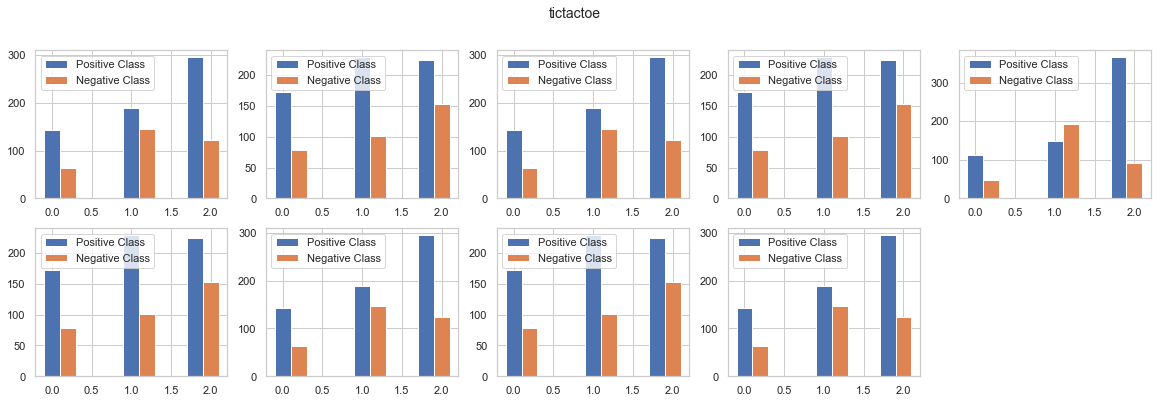

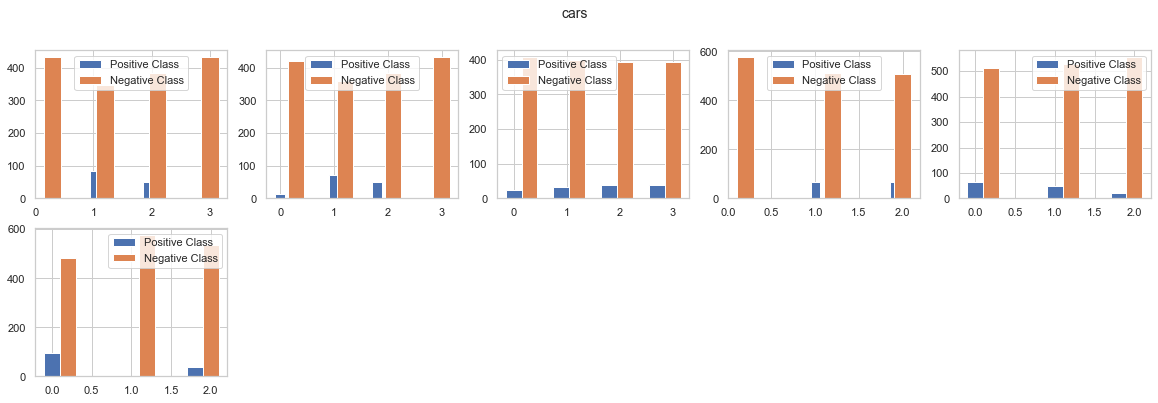

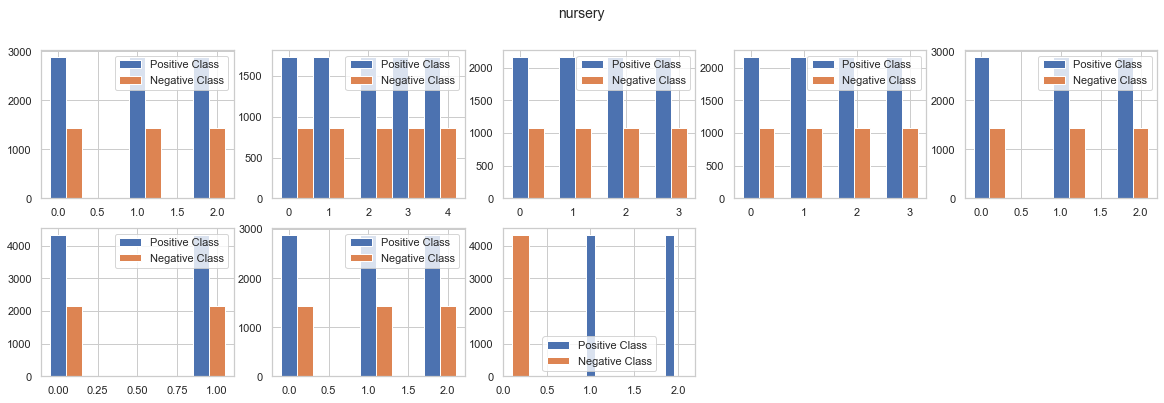

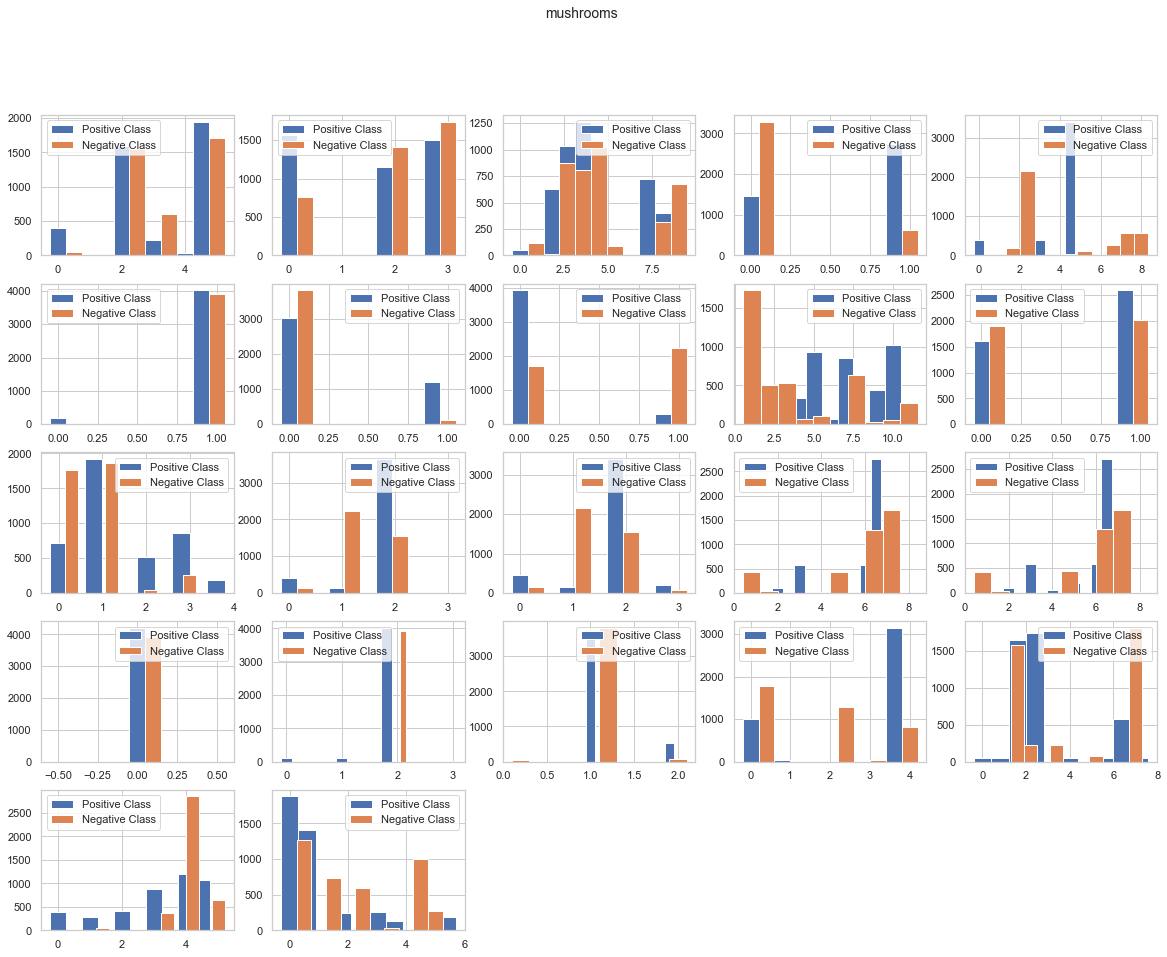

In [47]:
from math import ceil
datasets = [(data_tictactoe, y_tictactoe, 'tictactoe'), (data_cars, y_cars, 'cars'), 
            (data_nursery, y_nursery, 'nursery'), (data_mushrooms, y_mushrooms, 'mushrooms')]
for data,y,name in datasets:
    rows = ceil(data.shape[1] / 5)
    fig, axs = plt.subplots(rows, 5,figsize=(20,3 * rows))
    fig.suptitle(name, fontsize=14)
    for i in range(rows):
        for j in range(5):
            if (i * 5 + j) >= data.shape[1]:
                axs[i,j].axis('off')
                continue
            feature = data.iloc[:,i*5+j]
            axs[i,j].hist(feature[y == 1], label='Positive Class',align='left')
            axs[i,j].hist(feature[y == 0], label='Negative Class',align='right')
            axs[i,j].legend()
            axs
    plt.show()

Вставьте что угодно, описывающее ваши впечатления от этого задания:

[moOOo](https://youtu.be/H2eUz5k0Yhw)